# Linear Regression Exercise on E-Commerce data of a New York Based Company
## It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

### Avg. Session Length: Average session of in-store style advice sessions.
### Time on App: Average time spent on App in minutes
### Time on Website: Average time spent on Website in minutes
### Length of Membership: How many years the customer has been a member.

## Imports

In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
sns.set_palette("YlOrRd")
sns.set_style('whitegrid')

## Get the Data

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

### Yearly Amount Spent v/s Time on Website

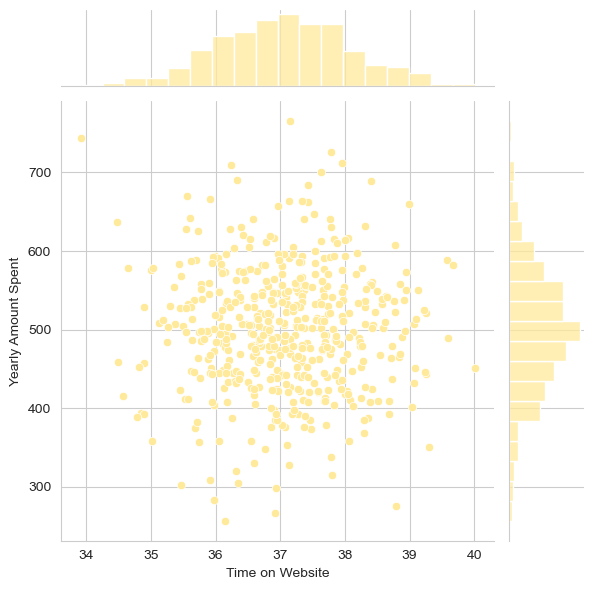

In [65]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

### Yearly Amount Spent v/s Time on App

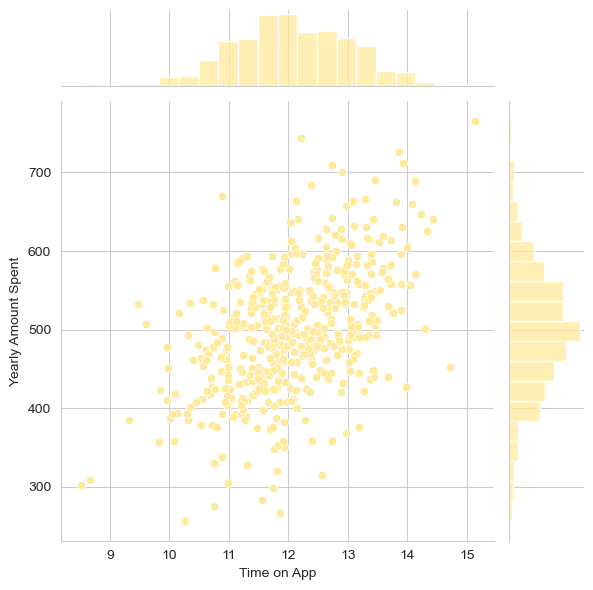

In [66]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

### 2D hex bin plot comparing Time on App and Length of Membership.

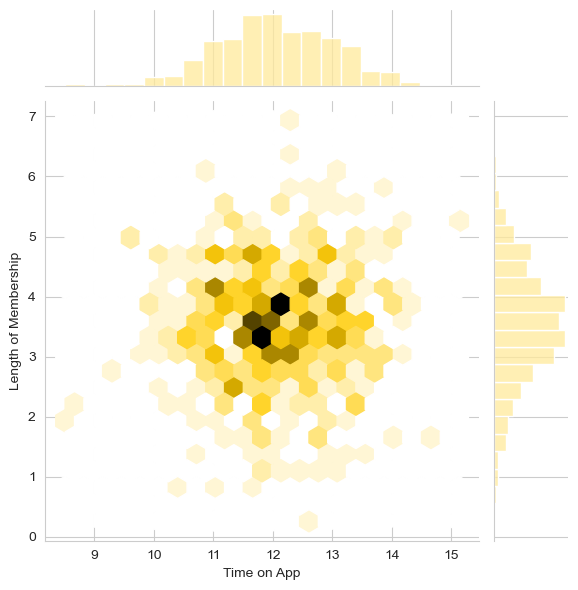

In [67]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

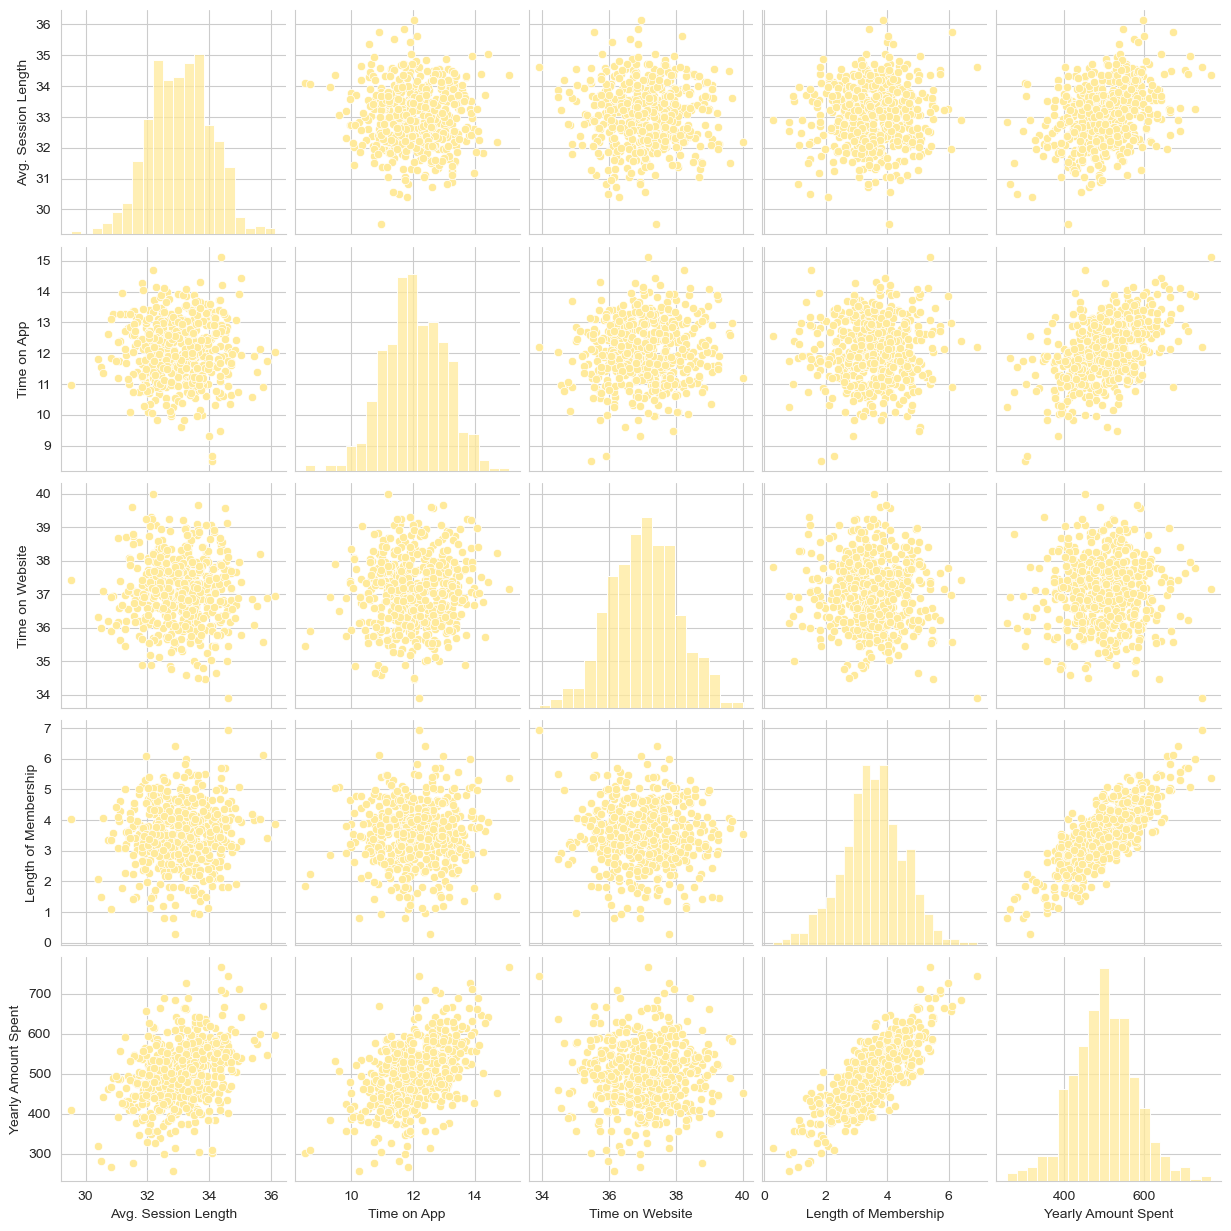

In [68]:
sns.pairplot(customers)

In [17]:
# Length of Memebership seems to be most correlated feature with Yearly Amount Spent

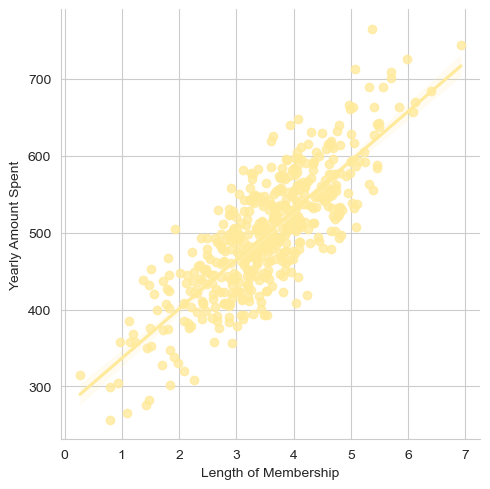

In [69]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

In [21]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [22]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
print("Coefficients: ",lm.coef_,sep='\n')

Coefficients: 
[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

In [31]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

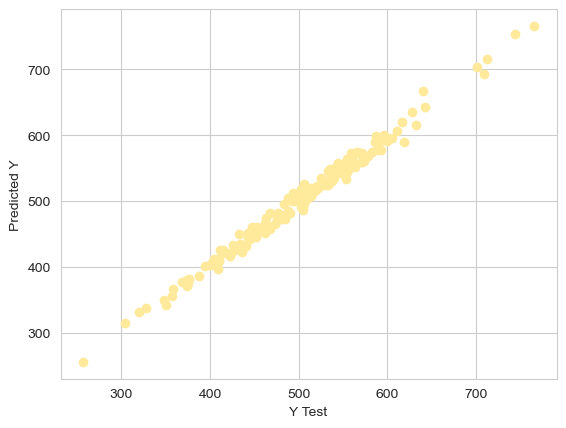

In [70]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [33]:
from sklearn import metrics

In [34]:
print("MAE: ",metrics.mean_absolute_error(y_test,predictions))
print("MSE: ",metrics.mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.228148653430832
MSE:  79.81305165097444
RMSE:  8.933815066978633


## Residuals

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

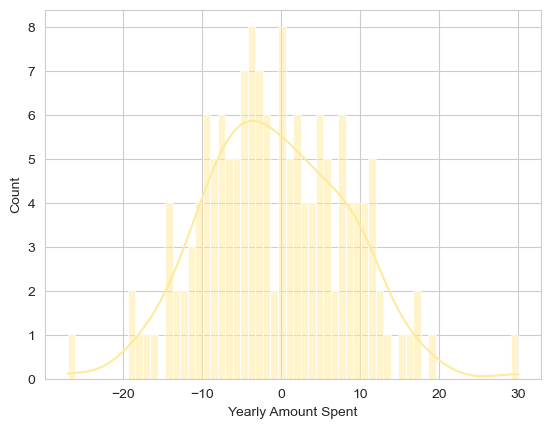

In [73]:
sns.histplot(y_test-predictions,bins=60,kde=True)

## Conclusion

In [51]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeffecient'])

In [52]:
cdf

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Interpreting these coefficients**

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

**Do I think the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!